In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [5]:
#import data 
dataset = pd.read_csv("C:/Users/FUGE/Desktop/PROJECT/finalml.csv")

In [10]:
data = dataset.drop(['Unnamed: 0','patient_id'],axis = 1)

In [12]:
data.columns

Index(['totalamt', 'medical_history_1', 'medical_history_2',
       'medical_history_3', 'medical_history_4', 'medical_history_5',
       'medical_history_6', 'medical_history_7', 'preop_medication_1',
       'preop_medication_2', 'preop_medication_3', 'preop_medication_4',
       'preop_medication_5', 'preop_medication_6', 'symptom_1', 'symptom_2',
       'symptom_3', 'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'age', 'stay', 'bmi', 'gender_F',
       'gender_M', 'race_Chinese', 'race_Indian', 'race_Malay', 'race_Others',
       'resident_status_Foreigner', 'resident_status_PR',
       'resident_status_Singaporean'],
      dtype='object')

In [16]:
colmean = data.loc[:,['lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'age', 'stay', 'bmi']].mean()
colstd = data.loc[:,['lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'age', 'stay', 'bmi']].std()

In [18]:
data.loc[:,['lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'age', 'stay', 'bmi']]= (data.loc[:,['lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'age', 'stay', 'bmi']]-colmean)/colstd  #data standardization

In [20]:
colmean

lab_result_1     14.469882
lab_result_2     27.431529
lab_result_3     99.489706
weight           78.748441
height          165.084412
age              52.039412
stay             11.051176
bmi              28.958874
dtype: float64

In [21]:
colstd

lab_result_1     1.747323
lab_result_2     2.463844
lab_result_3    15.254453
weight          10.975076
height           6.973678
age             14.698327
stay             2.850140
bmi              4.140674
dtype: float64

In [25]:
data.head()

,totalamt,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,bmi,gender_F,gender_M,race_Chinese,race_Indian,race_Malay,race_Others,resident_status_Foreigner,resident_status_PR,resident_status_Singaporean
0,5190.57,0,0,0,0,0,0,1,0,0,...,-0.268768,1,0,1,0,0,0,0,0,1
1,22601.50,0,1,0,0,0,1,0,0,0,...,1.411802,1,0,1,0,0,0,0,0,1
2,17447.18,0,1,0,0,0,0,1,0,0,...,-0.503841,0,1,0,1,0,0,0,0,1
3,15285.88,1,0,0,0,0,0,0,0,0,...,0.657094,1,0,1,0,0,0,0,0,1
4,73477.87,0,1,0,0,0,1,0,1,0,...,-0.965979,0,1,0,0,1,0,1,0,0


In [28]:
X = data.drop(['totalamt'],axis=1)
y = data.totalamt

In [45]:
y = (y - y.mean())/y.std()

0      -1.641354
1       0.073107
2      -0.434441
3      -0.647265
4       5.082923
5       0.412839
6      -0.035457
7       0.556673
8       0.369588
9      -0.597565
10      0.792844
11     -0.037333
12      0.849464
13     -0.760055
14     -0.871240
15     -1.009777
16      0.607334
17     -0.786445
18      2.299861
19     -0.718195
20     -0.130801
21      0.020263
22      2.601285
23      0.845355
24      0.521682
25     -0.783964
26      0.016623
27      0.583285
28      0.717851
29     -0.950804
          ...   
3370   -0.284576
3371   -1.047457
3372    0.452948
3373   -1.132934
3374    1.837254
3375   -0.667615
3376   -0.077776
3377    0.215594
3378    0.860513
3379   -1.364051
3380   -0.502034
3381    0.892034
3382    0.686858
3383    0.226587
3384    0.457949
3385    0.777191
3386   -0.600493
3387    0.284049
3388    0.996995
3389   -0.880134
3390   -0.722007
3391   -0.809978
3392    0.616865
3393   -0.793685
3394   -1.164662
3395   -1.692017
3396   -0.769057
3397    0.8069

In [24]:
from sklearn.cross_validation import train_test_split #split for training set and test set

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [49]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [50]:
y_test.shape

(1020,)

In [51]:
# use sklearn ridge regression, change for different alpha and check 
alpha = np.logspace(-6,2.5,50)
for a in alpha:
    clf = Ridge(alpha = a)
    clf.fit(X_train,y_train)
    y_p = clf.predict(X_test)
    score = sum((y_p-y_test)**2)/1020
    print (a, score)

1e-06 0.0792196339067
1.49097165718e-06 0.0792196339415
2.22299648253e-06 0.0792196339934
3.31442474947e-06 0.0792196340708
4.94171336132e-06 0.0792196341862
7.36795455966e-06 0.0792196343582
1.09854114199e-05 0.0792196346146
1.63789370695e-05 0.079219634997
2.44205309455e-05 0.079219635567
3.64103194931e-05 0.079219636417
5.42867543932e-05 0.0792196376843
8.09400121608e-05 0.0792196395738
0.000120679264064 0.079219642391
0.000179929362329 0.0792196465915
0.000268269579528 0.0792196528545
0.000399982339561 0.0792196621928
0.000596362331659 0.0792196761168
0.000889159333916 0.079219696879
0.00132571136559 0.079219727839
0.0019765980717 0.0792197740087
0.00294705170255 0.079219842867
0.00439397056076 0.0792199455787
0.0065512855686 0.0792200988205
0.00976778110089 0.0792203275259
0.014563484775 0.0792206690214
0.0217137430294 0.079221179297
0.0323745754282 0.0792219425793
0.0482695743768 0.0792230861038
0.0719685673001 0.079224803236
0.107303094053 0.0792273903556
0.159985871961 0.079231

In [60]:
clf = Ridge(alpha = 0.0001,max_iter=1000)
clf.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
y_p = clf.predict(X_test)

In [62]:
y_p


array([-0.67551507,  0.21985496,  0.23725056, ..., -0.18386349,
        1.34140792,  0.18155629])

In [63]:
y_test

array([-0.67993031, -0.02798639,  0.2080944 , ..., -0.17865299,
        1.52015036,  0.03683765])

In [66]:
np. mean(abs(y_p - y_test))  #the error is about 0.16 sigma - 1600 dollars

0.16256380034845525

In [144]:
## random forest
maxfeat = [0.01,0.03,0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
for m in maxfeat:
    clf = RandomForestRegressor(n_estimators = 50,max_features = m)
    clf.fit(X_train,y_train)
    y_p1 = clf.predict(X_test)
    score = (sum((y_p1 - y_test)**2))/1020
    print (m,score)

0.01 0.442582523405
0.03 0.447255677449
0.1 0.226541633865
0.3 0.113595201983
0.4 0.104674056053
0.5 0.101529998682
0.6 0.0990228410779
0.7 0.101793679504
0.8 0.104946975266
0.9 0.105437642075
0.99 0.104319208534


In [74]:
from xgboost import XGBRegressor

In [78]:
params = [1,2,3,4,5,6]  #XGBoost performance better, best when max_depth = 4 
for p in params:
    clf = XGBRegressor(max_depth = p)
    clf.fit(X_train,y_train)
    y_p2 = clf.predict(X_test)
    score =(sum((y_p2 - y_test)**2))/1020
    print(p,score)

1 0.203205205277
2 0.0692268830663
3 0.0368584151233
4 0.0274058054297
5 0.0318141669317
6 0.042231649458


In [80]:
clf = XGBRegressor(max_depth = 4)
clf.fit(X_train,y_train)
y_pfinal = clf.predict(X_test)

In [90]:
yf = y_pfinal*10155+21859

In [127]:
yt = y_test*10155+21859

In [96]:
xax = np.mean(abs(yf-yt))

1034.3927447823921

In [102]:

%matplotlib inline

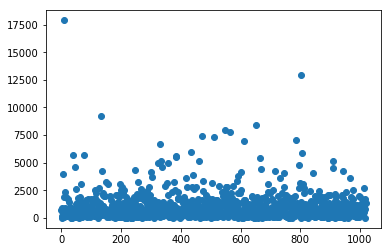

In [103]:
plt.scatter(xax,abs(yf-yt))

In [104]:
import seaborn as sns

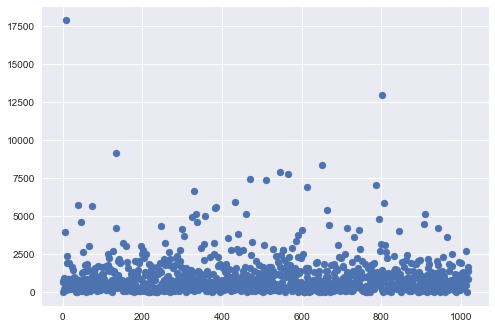

In [105]:
plt.scatter(xax,abs(yf-yt))

In [119]:
err =abs(yf-yt)
error = pd.DataFrame(err,columns = ['error abs'])

In [120]:
error.describe()

,error abs
count,1020.000000
mean,1034.392745
std,1325.877801
min,0.044574
25%,281.893516
50%,679.625832
75%,1312.683548
max,17895.026946


In [128]:
yt = pd.DataFrame(yt,columns = ['ytest'])

In [131]:
yf = pd.DataFrame(yf,columns = ['ypredict'])

In [133]:
yt['ypredict']=yf

In [135]:
yt['error']=error

In [137]:
yt['error percent']=yt.error/yt.ytest

In [141]:
yt = yt.rename(columns={'error percent':'error_percent'})

In [142]:
yt.error_percent.describe()

count    1020.000000
mean        0.046726
std         0.046146
min         0.000002
25%         0.014601
50%         0.034045
75%         0.064347
max         0.506092
Name: error_percent, dtype: float64

In [143]:
yt.to_csv("C:/Users/FUGE/Desktop/PROJECT/prediction.csv")

In [149]:
clf = XGBRegressor(max_depth = 3,n_estimators = 1000,learning_rate =0.1,reg_lambda = 0)
clf.fit(X_train,y_train)
y_pfinal = clf.predict(X_test)

In [150]:
yf = y_pfinal*10155+21859
yt = y_test*10155+21859
xax = np.mean(abs(yf-yt))

In [153]:
err =abs(yf-yt)
error = pd.DataFrame(err,columns = ['error abs'])
error.describe()

,error abs
count,1020.000000
mean,743.746923
std,1071.494235
min,1.004607
25%,204.210032
50%,454.686556
75%,883.063407
max,12283.956634


In [154]:
yt = pd.DataFrame(yt,columns = ['ytest'])
yf = pd.DataFrame(yf,columns = ['ypredict'])
yt['ypredict']=yf
yt['error']=error
yt['error_percent']=yt.error/yt.ytest
yt.error_percent.describe()

count    1020.000000
mean        0.034631
std         0.048485
min         0.000050
25%         0.010159
50%         0.022900
75%         0.044405
max         0.924589
Name: error_percent, dtype: float64

In [166]:
clf = XGBRegressor(max_depth = 3,n_estimators = 10000,learning_rate =0.1,reg_lambda = 0)
clf.fit(X_train,y_train)
y_pfinal = clf.predict(X_test)

In [167]:
yf = y_pfinal*10155+21859
yt = y_test*10155+21859
xax = np.mean(abs(yf-yt))
err =abs(yf-yt)
error = pd.DataFrame(err,columns = ['error abs'])
error.describe()

,error abs
count,1020.000000
mean,711.699947
std,1031.794624
min,2.269173
25%,189.625381
50%,436.053989
75%,852.209049
max,11957.440680


In [172]:
from sklearn.svm import SVR

In [173]:
clf = SVR(C=100,kernel = 'poly',degree =2)
clf.fit(X_train,y_train)
y_pfinal = clf.predict(X_test)

In [174]:
yf = y_pfinal*10155+21859
yt = y_test*10155+21859
xax = np.mean(abs(yf-yt))
err =abs(yf-yt)
error = pd.DataFrame(err,columns = ['error abs'])
error.describe()

,error abs
count,1020.000000
mean,682.367797
std,682.603856
min,1.369197
25%,268.403870
50%,530.230986
75%,913.214282
max,9421.641862


In [175]:
yt = pd.DataFrame(yt,columns = ['ytest'])
yf = pd.DataFrame(yf,columns = ['ypredict'])
yt['ypredict']=yf
yt['error']=error
yt['error_percent']=yt.error/yt.ytest
yt.error_percent.describe()

count    1020.000000
mean        0.035658
std         0.037438
min         0.000068
25%         0.012775
50%         0.026130
75%         0.045123
max         0.515447
Name: error_percent, dtype: float64

In [176]:
xax

682.36779692884113

In [177]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [179]:
#implement RIDGE with polynomial features
clf = make_pipeline(PolynomialFeatures(degree =2),Ridge(alpha = 0.3))
clf.fit(X_train,y_train)
y_pfinal = clf.predict(X_test)

In [180]:
yf = y_pfinal*10155+21859
yt = y_test*10155+21859
xax = np.mean(abs(yf-yt))
print('xax :',xax)
err =abs(yf-yt)
error = pd.DataFrame(err,columns = ['error abs'])
error.describe()

xax : 329.335243201


,error abs
count,1020.000000
mean,329.335243
std,518.228503
min,0.409380
25%,106.607145
50%,219.463349
75%,384.703014
max,10256.052301


In [181]:
yt = pd.DataFrame(yt,columns = ['ytest'])
yf = pd.DataFrame(yf,columns = ['ypredict'])
yt['ypredict']=yf
yt['error']=error
yt['error_percent']=yt.error/yt.ytest
yt.error_percent.describe()

count    1020.000000
mean        0.016508
std         0.020389
min         0.000013
25%         0.005049
50%         0.010580
75%         0.019974
max         0.232323
Name: error_percent, dtype: float64

In [192]:
#implement XGBregressor with polynomial features degree =2 , looks like over fitting
clf = make_pipeline(PolynomialFeatures(), XGBRegressor(max_depth = 3,n_estimators = 1000,reg_lambda = 0.3))
clf.fit(X_train,y_train)
y_pfinal = clf.predict(X_test)

In [193]:
yf = y_pfinal*10155+21859
yt = y_test*10155+21859
xax = np.mean(abs(yf-yt))
print('xax :',xax)
err =abs(yf-yt)
error = pd.DataFrame(err,columns = ['error abs'])
error.describe()

xax : 738.492857122


,error abs
count,1020.000000
mean,738.492857
std,1035.269875
min,0.223958
25%,203.893193
50%,469.319372
75%,876.166612
max,13459.964118
